<a href="https://colab.research.google.com/github/gaurinaik22/CMPE257-Fall23-Gauri-Naik/blob/homework-3/HW3_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2 as cv

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ML/ZipDigits.train', header=None,sep = ' ')

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [ ]:
df_train.shape

(7291, 258)

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/ML/ZipDigits.test', header=None,sep = ' ')

In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,NaN


In [ ]:
df_test.shape

(2007, 258)

Removing NAN from the dataset column 257

In [ ]:
df_train = df_train.drop(df_train.columns[257], axis=1)
df_test = df_test.drop(df_test.columns[257], axis=1)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3.0,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,3.0,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,3.0,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


In [ ]:
print(df_train.shape)
print(df_test.shape)

(7291, 257)
(2007, 257)


In [ ]:
df_Filtered_train = df_train.copy()

In [ ]:
df_Filtered_train = df_Filtered_train[(df_Filtered_train[0] == 1.0) | (df_Filtered_train[0] == 5.0)]

In [ ]:
df_Filtered_train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
12,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.998,0.613,-0.385,...,-0.968,0.192,0.159,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
13,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.457,-0.219,...,-1.000,-0.086,0.804,-0.953,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,5.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7271,5.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.937,-0.333,...,0.820,0.549,0.154,-0.763,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7284,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.204,1.000,...,-1.000,0.028,1.000,0.274,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7285,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.744,0.788,0.113,...,-0.762,0.778,0.786,-0.748,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [ ]:
df_Filtered_train[[0]].value_counts()

1.0    1005
5.0     556
dtype: int64

In [ ]:
df_Filtered_train.loc[df_Filtered_train[0] == 1.0, 0] = 1
df_Filtered_train.loc[df_Filtered_train[0] == 5.0, 0] = -1

In [ ]:
df_Filtered_train[[0]].value_counts()

 1.0    1005
-1.0     556
dtype: int64

In [ ]:
df_Filtered_train.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,-1.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
12,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.998,0.613,-0.385,...,-0.968,0.192,0.159,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
13,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.457,-0.219,...,-1.000,-0.086,0.804,-0.953,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [ ]:
df_Filtered_train[[0]].value_counts()

 1.0    1005
-1.0     556
dtype: int64

In [ ]:
df_Filtered_test = df_test.copy()
df_Filtered_test.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [ ]:
df_Filtered_test = df_Filtered_test[(df_Filtered_test[0] == 1.0) | (df_Filtered_test[0] == 5.0)]
df_Filtered_test.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
16,1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.586,0.693,1.000,...,-1.000,-0.601,0.592,0.219,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
32,5.0,-1.0,-1.0,-1.0,-1.0,-0.933,0.461,0.779,0.584,0.584,...,1.000,0.857,0.371,-0.397,-0.949,-1.0,-1.0,-1.0,-1.0,-1.0
36,5.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
42,1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,0.561,-0.264,...,-0.874,0.374,0.729,-0.916,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
45,1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,0.219,0.787,-0.333,...,-0.932,-0.169,0.935,0.396,-0.931,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
# Split the DataFrame into X and y using array slicing for Train dataset
X_train = df_Filtered_train.iloc[:, 1:]
y_train = df_Filtered_train.iloc[:, 0]

In [ ]:
X_train.shape

(1561, 256)

In [ ]:
y_train.shape

(1561,)

In [ ]:
# Split the DataFrame into X and y using array slicing for Test dataset
X_test = df_Filtered_test.iloc[:, 1:]
y_test = df_Filtered_test.iloc[:, 0]

In [ ]:
X_test.shape

(424, 256)

In [ ]:
y_test.shape

(424,)

In [ ]:
# reshape the data into 16x16 images
X_train = X_train.values.reshape(-1, 16, 16)
X_test = X_test.values.reshape(-1, 16, 16)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1561, 16, 16)
(1561, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(424, 16, 16)
(424, 1)


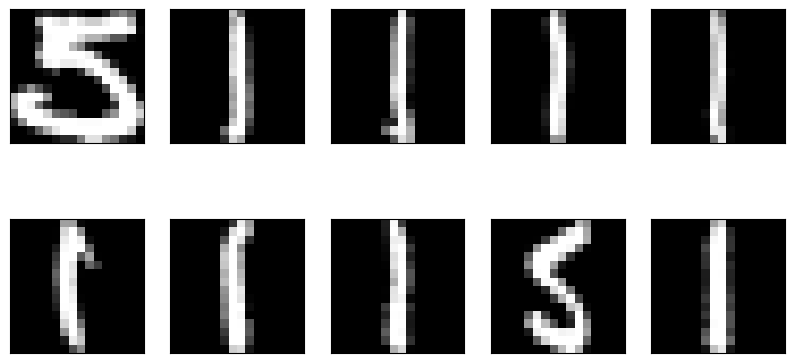

In [ ]:
# Create a subplot for each image
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

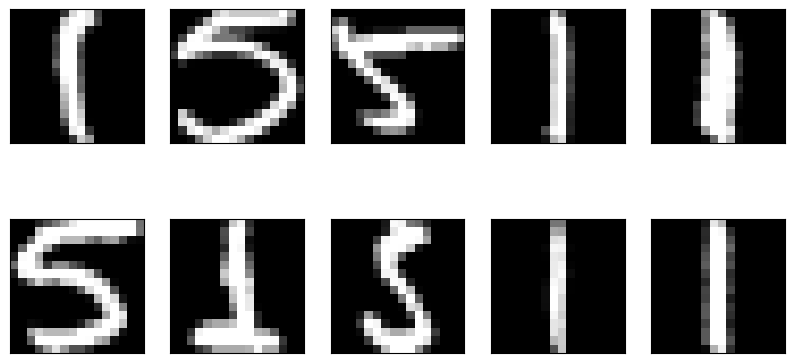

In [ ]:
# Create a subplot for each image
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
def calculateIntensity(gray_image):
    return np.mean(gray_image)

In [ ]:
pip install opencv-python

In [ ]:
def calculateSymmetry(gray_image):
    flipped_image = cv.flip(gray_image, 1)
    difference = cv.absdiff(gray_image, flipped_image)
    return np.mean(difference)

In [ ]:
trainIntensities = []
trainSymmetries = []

for i in X_train:
    trainIntensities.append(calculateIntensity(i))
    trainSymmetries.append(calculateSymmetry(i))

In [ ]:
testIntensities = []
testSymmetries = []

for i in X_test:
    testIntensities.append(calculateIntensity(i))
    testSymmetries.append(calculateSymmetry(i))

In [ ]:
len(trainIntensities)

1561

In [ ]:
len(trainSymmetries)

1561

In [ ]:
len(testIntensities)

424

In [ ]:
len(testSymmetries)

424

In [ ]:
df_Filtered_train['intensity'] = trainIntensities
df_Filtered_train['symmetry'] = trainSymmetries

In [ ]:
df_Filtered_test['intensity'] = testIntensities
df_Filtered_test['symmetry'] = testSymmetries

In [ ]:
train_1000iter = pd.DataFrame({'x1': df_Filtered_train['intensity'], 'x2': df_Filtered_train['symmetry'], 'y':df_Filtered_train[0]})

In [ ]:
test_1000iter = pd.DataFrame({'x1': df_Filtered_test['intensity'], 'x2': df_Filtered_test['symmetry'], 'y':df_Filtered_test[0]})

In [ ]:
train_1000iter.head()

,x1,x2,y
1,-0.111738,0.533727,-1.0
7,-0.753914,0.117438,1.0
9,-0.772281,0.162297,1.0
12,-0.769258,0.059500,1.0
13,-0.795438,0.050906,1.0


In [ ]:
test_1000iter.head()

,x1,x2,y
16,-0.680133,0.312063,1.0
32,-0.350320,0.765687,5.0
36,-0.497641,0.392437,5.0
42,-0.750781,0.085938,1.0
45,-0.561766,0.116406,1.0


In [ ]:
train_1000iter['x0'] = 1
test_1000iter['x0'] = 1
train_1000iter = train_1000iter[['x0', 'x1', 'x2', 'y']]
test_1000iter = test_1000iter[['x0', 'x1', 'x2', 'y']]


In [ ]:
train_1000iter.head()

,x0,x1,x2,y
1,1,-0.111738,0.533727,-1.0
7,1,-0.753914,0.117438,1.0
9,1,-0.772281,0.162297,1.0
12,1,-0.769258,0.059500,1.0
13,1,-0.795438,0.050906,1.0


In [ ]:
test_1000iter.head()

,x0,x1,x2,y
16,1,-0.680133,0.312063,1.0
32,1,-0.350320,0.765687,5.0
36,1,-0.497641,0.392437,5.0
42,1,-0.750781,0.085938,1.0
45,1,-0.561766,0.116406,1.0


In [ ]:
len(train_1000iter)

1561

In [ ]:
len(test_1000iter)

424

In [ ]:
def tanh(x):
    return np.tanh(x)

In [ ]:
def tanhDerivative(x):
    return 1 - np.tanh(x)**2

In [ ]:
# Creating a column vector input_vector with three elements
input_vector = np.ones((3,1))

In [ ]:
input_vector[0] = 1
input_vector[1] = train_1000iter.iloc[0,1]
input_vector[2] = train_1000iter.iloc[0,2]

In [ ]:
output_value = train_1000iter.iloc[0,3]

In [ ]:
print('\ninput_vector:', input_vector)


input_vector: [[ 1.        ]
 [-0.11173828]
 [ 0.53372656]]


In [ ]:
print('\noutput_value:', output_value)


output_value: -1.0


In [ ]:
global w1
global w2

In [ ]:
w1 = np.array([[0.1, 0.4], [0.2, 0.5],[0.3,0.6]])
w2 = np.array([[1],[2],[3]])

In [ ]:

def forwardPropogation(w1,w2):
    w1_transpose = w1.T
    w2_transpose = w2.T

    s1 = np.dot(w1_transpose, input_vector)
    x1 = np.ones((3,1))
    for i in range(1, len(x1)):
        x1[i] = tanh(s1[i-1])

    s2 = np.dot(w2_transpose, x1)
    x2 = np.ones((2,1))
    for i in range(1, len(x2)):
        x2[i] = tanh(s2[i-1])

    output = tanh(s2)

    return x1,x2,s1,s2,w1,w2,output



In [ ]:
def backPropogation(x1,s2,w1,w2,op):
    lr = 0.01
    delta2 = 2*(tanh(s2) - output_value) * tanhDerivative(s2)
    delta1 = delta2 * w2[1][0] * tanhDerivative(s2)

    g2 = np.dot(delta2, x1.T)
    g1 = np.dot(delta1, input_vector.T)

    final_w2 = w2 - lr*g2.T
    final_w1 = w1 - lr*g1.T

    w2 = final_w2
    w1 = final_w1

    return final_w1, final_w2

In [ ]:
print('w1:', w1)
print('w2:', w2)

w1: [[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]
w2: [[1]
 [2]
 [3]]


In [ ]:
lossList = []

In [ ]:
from typing_extensions import Final

for epoch in range(0, 1281):

    for i in range(0, len(train_1000iter)):
        x = np.random.randint(0,1561)


        input_vector[0] = 1
        input_vector[1] = train_1000iter.iloc[x,1]
        input_vector[2] = train_1000iter.iloc[x,2]
        op = train_1000iter.iloc[x,3]



        x1,x2,s1,s2,w1,w2,output = forwardPropogation(w1,w2)
        final_w1, final_w2= backPropogation(x1,s2,w1,w2,op)

        w1 = final_w1
        w2 = final_w2

        FinalneuralNetwork = tanh(final_w2[1][0])
        if op==1:
            loss = np.mean(np.square(op-FinalneuralNetwork))
        else:
            loss = np.mean(np.square(FinalneuralNetwork))

        if i == len(train_1000iter)-1 and epoch%100 == 0:
            print('Epoch : ', epoch, ', Loss : ', loss)

    lossList.append(loss)

Epoch :  0 , Loss :  0.0006790537568018085
Epoch :  100 , Loss :  0.9666455131329453
Epoch :  200 , Loss :  0.00023281210463256793
Epoch :  300 , Loss :  0.9715206004537897
Epoch :  400 , Loss :  0.0001880218711706065
Epoch :  500 , Loss :  0.00017512136174668757
Epoch :  600 , Loss :  0.974492654663215
Epoch :  700 , Loss :  0.00015660664670158413
Epoch :  800 , Loss :  0.0001498409024118953
Epoch :  900 , Loss :  0.00014381518260686533
Epoch :  1000 , Loss :  0.00013866602238500072
Epoch :  1100 , Loss :  0.00013428965985791142
Epoch :  1200 , Loss :  0.9773138696827374


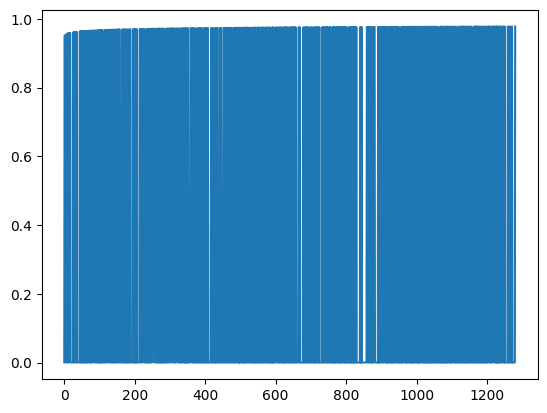

In [ ]:
plt.plot(lossList)

In [ ]:
print('w1', w1)
print('w2', w2)

w1 [[-0.69286024 -0.39286024]
 [ 0.52831046  0.82831046]
 [-0.04345707  0.25654293]]
w2 [[-0.17842595]
 [ 2.58622008]
 [ 3.23721309]]


In [ ]:
print(x2)
print(x2[1][0])

[[ 1.        ]
 [-0.99838814]]
-0.9983881363710283


In [ ]:
a = w1
b = w2
count = 0
for i in range(len(test_1000iter)):
    input_vector[0] = 1
    input_vector[1] = test_1000iter.iloc[i,1]
    input_vector[2] = test_1000iter.iloc[i,2]
    op = test_1000iter.iloc[i,3]

    x1,x2,s1,s2,w1,w2,output = forwardPropogation(a,b)

    if np.sign(output) == np.sign(op):
        count += 1

print('Accuracy', count/len(test_1000iter)*100)


Accuracy 0.0
